In [1]:
import numpy as np
from acrobotics.recources.robots import Kuka
from acrobotics.recources.path_on_table import path_pos_tol, scene, path_ori_free
from pyquaternion import Quaternion

In [2]:
robot = Kuka()
path = path_pos_tol
# path = path_ori_free

In [3]:
%%capture
from acrobotics.planning import cart_to_joint_iterative

res = cart_to_joint_iterative(robot, path, scene, num_samples=200, max_iters=5)
print(res)
qp_sol = res['path']

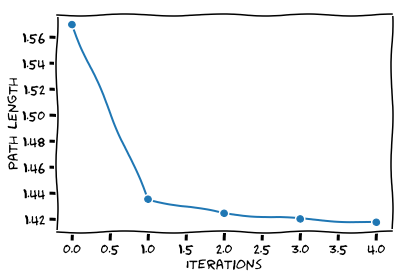

In [4]:
import matplotlib.pyplot as plt
from acrobotics.util import get_default_axes3d,plot_reference_frame

# fig, ax = plt.subplots()
# ax.plot(, 'o-')
# ax.set_title('Cost as function of iterations')
with plt.xkcd():
    plt.plot(res['costs'], 'o-')
    plt.xlabel('Iterations')
    plt.ylabel('Path length')
plt.show()

In [5]:
# %matplotlib qt

# #%% ANIMATE
# fig2, ax2 = get_default_axes3d([-1, 1], [-1, 1], [-1, 1])
# for pi in path: pi.plot(ax2)
# scene.plot(ax2, c='g')
# robot.animate_path(fig2, ax2, qp_sol)
# plt.show(block=True)

## Look at end-effector path

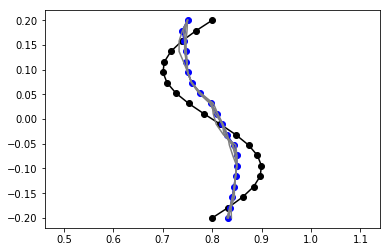

In [6]:
fig, ax = plt.subplots()

# nominal end-effector task
p_task = np.array([tp.pos_nom for tp in path]).T
ax.plot(p_task[0], p_task[1], 'ko-')
lims = plt.axis('equal')

# solution end-effector path
p_sol = np.array([robot.fk(qi)[:3, 3] for qi in res['path']]).T
ax.plot(p_sol[0], p_sol[1], 'bo-')

# intermediat steps
for path_i in res['paths'][:-1]:
    p_i = np.array([robot.fk(qi)[:3, 3] for qi in path_i]).T
    ax.plot(p_i[0], p_i[1], '-', c='grey')

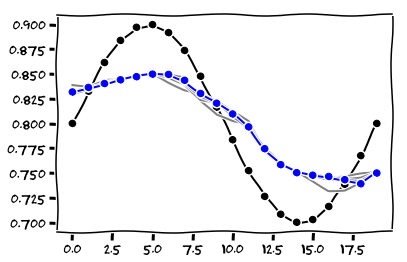

In [9]:
with plt.xkcd():
    fig, ax = plt.subplots()

    ax.plot(p_task[0], 'ko-')
    

    for path_i in res['paths'][:-1]:
        p_i = np.array([robot.fk(qi)[:3, 3] for qi in path_i]).T
        ax.plot(p_i[0], '-', c='grey')
    
    ax.plot(p_sol[0], 'bo-')